<h1><center>Score Prediction By The Amount of Hours Studied</center></h1>

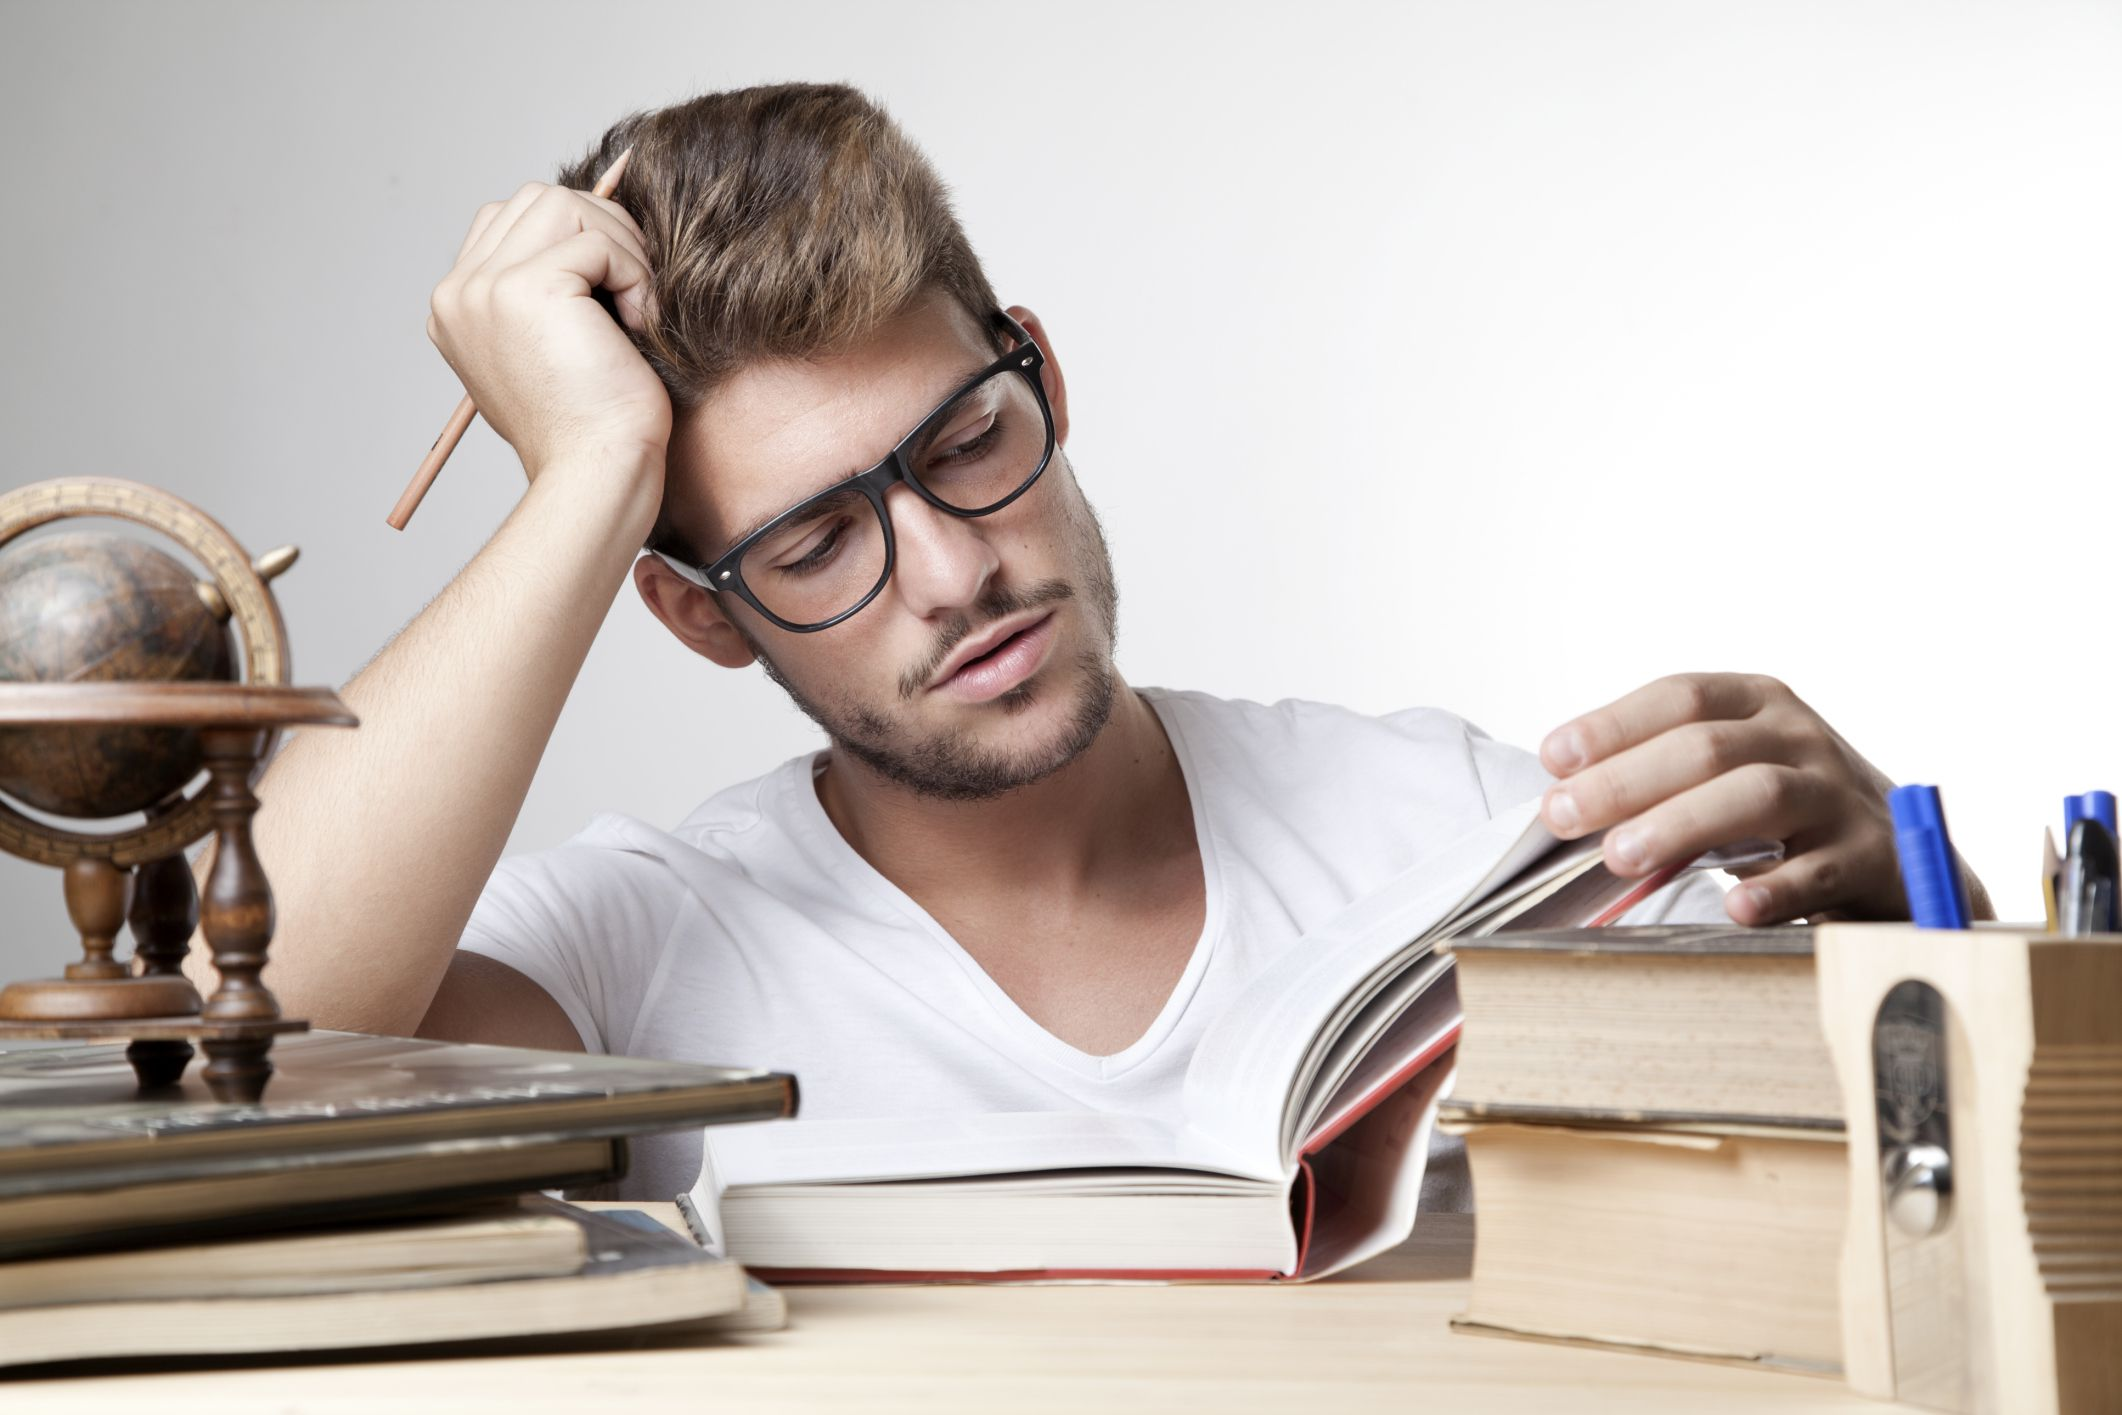

<h2>Introduction</h2>
In the following notebook, we will see the scores of student based on the hours of study. This is a simple linear regression notebook.


<h2>Features</h2>
<ul>
    <li><b>Hours  : </b> Number of hours studied
    <li><b>Scores : </b> Resulting score after studying 

<h2>Objective</h2>
To predict the score by using the number of hours studied. 

<h3>Importing Libraries</h3>

In [1]:
#importing requiring libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

<h3>Reading & Loading Dataset</h3>

In [2]:
#reading the dataset
study=pd.read_excel('Study_hours.xlsx')

In [3]:
#getting the shape of the dataset
study.shape

(25, 2)

In [4]:
#getting peek of the first five observations
study.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#getting general information about the features of the dataset
study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#getting peek count, mean, min, max, std of the features
study.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<li> The reading and loading of dataset has been performed. There are two features in the dataset. The data type of the feature is float and integer. There are total 25 number of observations(rows).

<h3>Presence of Null Values</h3>

In [7]:
#checking presence of null values in the dataset
study.isnull().sum()

Hours     0
Scores    0
dtype: int64

<li> The dataset does not contain any null values.

<h3>Dropping Duplicates</h3>

In [8]:
#dropping duplicate values present in the dataset
study.drop_duplicates(inplace=True)

<li>Duplicate observations has been dropped. 

<h3>Feature Distribution</h3>

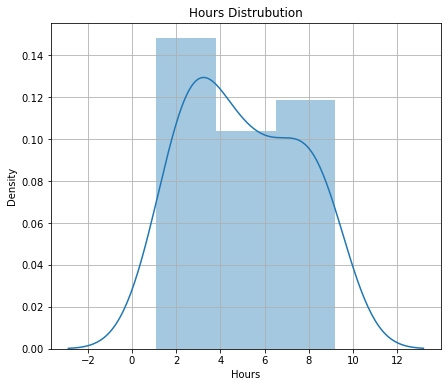

In [9]:
#checking the distribution of the Hours feature
plt.figure(figsize=(7,6))
sns.distplot(study['Hours'])
plt.title('Hours Distrubution')
plt.grid()
plt.show()

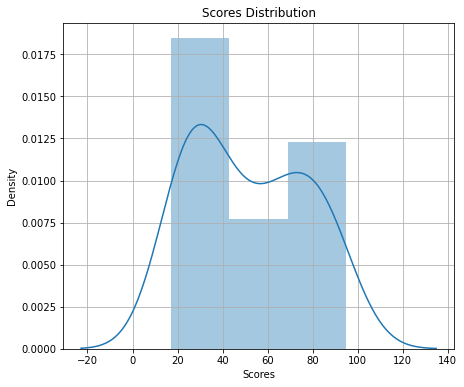

In [10]:
#checking the distribution of the Scores feature
plt.figure(figsize=(7,6))
sns.distplot(study['Scores'])
plt.title('Scores Distribution')
plt.grid()
plt.show()

<li> The Independent and Dependent features of the dataset are fairly distributed.

<h3>Relation Between Features</h3>

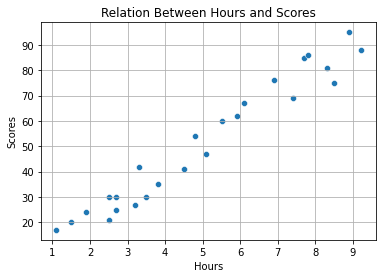

In [11]:
#checking the relation between hours and scores 
sns.scatterplot(data=study,x='Hours',y='Scores')
plt.title('Relation Between Hours and Scores')
plt.grid()
plt.show()

<li>After plotting Hours and Scores in a scatter plot, a linear relation has been observed between Hours and Scores. 
<li>This scatter plot concludes that, as the hour of study increases the score also increases.  

<h3>Splitting Dependent and Independent Features</h3>

In [12]:
#splitting the dataset
X=study.iloc[:,:1]
Y=study.iloc[:,-1:]

<h3>Train-Test Split</h3>

In [13]:
#train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

<h3>Model Training</h3>

In [14]:
#importing libraries for model training
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [15]:
#linear Regression model
lr=LinearRegression()

In [16]:
#fitting the train and test dataset into linear Regression model
lr.fit(X_train,Y_train)

LinearRegression()

In [17]:
#gives the coefficient of the features of your dataset
m=lr.coef_
print('The coefficient value : ',m)
#represents the mean value of the response variable when all of the predictor variables in the model are equal to zero
c=lr.intercept_
print('The intercept value : ',c)

The coefficient value :  [[9.60498629]]
The intercept value :  [3.09804089]


<h3>Prediction and Error</h3>

In [18]:
#predicting y using the test data
y_pred=lr.predict(X_test)
#calculating error
error=Y_test - y_pred

In [19]:
#checking the score of train data
train_score=lr.score(X_train,Y_train)
print('The train score : ',train_score)
#checking the score of test data
test_score=lr.score(X_test,Y_test)
print('The test score : ',test_score)

The train score :  0.9583509805345388
The test score :  0.9000546706590146


<li>The train set has performed with an accuracy of 95%
<li>The test set has performed with an accuracy of 90%

<h3>Model Evaluation</h3>

In [20]:
#import model evaluation parameters
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
#model evaluation through mean absolute error method
print('MAE : ',mean_absolute_error(Y_test,y_pred))
#model evaluation through mean squared error method
print('MSE : ',mean_squared_error(Y_test,y_pred))
#model evaluation through root mean squared error
print('RMSE : ',np.sqrt(mean_squared_error(Y_test,y_pred)))

MAE :  6.012413762390567
MSE :  37.56345257951597
RMSE :  6.1289030486308045


The Model Evaluation has been performed and the Mean Absolute Error is 6 which is inclined towards zero.

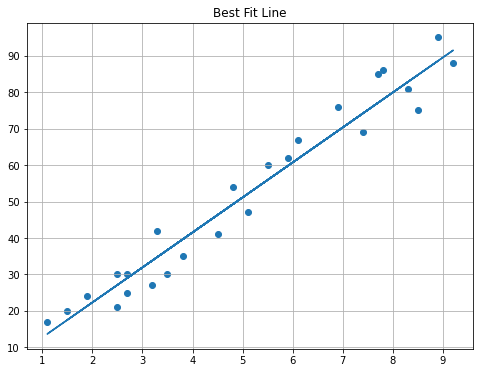

In [22]:
#pltting regression line across the points of 
regression_line= m * X + c
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.plot(X,regression_line)
plt.title('Best Fit Line')
plt.grid()
plt.show()

This scatter plot represents the regression line and the actual data points. From the graph it can be seen that the error(residual) is very less and the model is  ready. 

<h3>Score Prediction</h3>

<li>Using the coefficient and the intercept to predict the score:

In [23]:
#creating a function to predict scores based on number of hours 
def predit_score(h):
    score=(m*h+c)
    print(f'The Score after studying for {h} hours would be ',round(int(score)))

In [24]:
#score predictor function
predit_score(9.25)

The Score after studying for 9.25 hours would be  91


The score has been sucessfully predicted. 